# UILC

Implementation Vaildation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")


In [2]:
from uilc import *

## ESC

Extended Sparrow Criterion

### Linear 

In [3]:
# Optical and geometrical system parameter
s = 3
h = 0.3
Nx, Ny = 4, 5

lamber_pattern = lambda d: radiation.lambertian(s, h, d)

In [4]:
#Linear pattern
# case 1
coef_x, coef_y = crit.ESC.coefficient(s, Nx, Ny, shape="L")
esc_xarry = h*coef_x * utils.misc.csym_index(Nx)
esc_yarry = h*coef_y * utils.misc.csym_index(Ny)
esc_array_linear = PositionArray.from_arrays(esc_xarry, esc_yarry)

# case 2
esc_array_linear = h*crit.ESC.array(s, Nx, Ny, shape="L")

In [5]:
Wx, Wy = esc_array_linear.area

In [6]:
(X, Y), extent_xy =  utils.misc.plot_xy_mesh([-Wx, Wx, -Wy, Wy], (0.7, 0.7), (400, 400))

In [7]:
# Intensity calcualtion
esc_Z_linear = esc_array_linear.intensity_on((X,Y), lamber_pattern)

In [8]:
esc_source_linear = esc_array_linear.intensity_on((X,Y), lambda d: radiation.gaussian(1, 0.06, d))

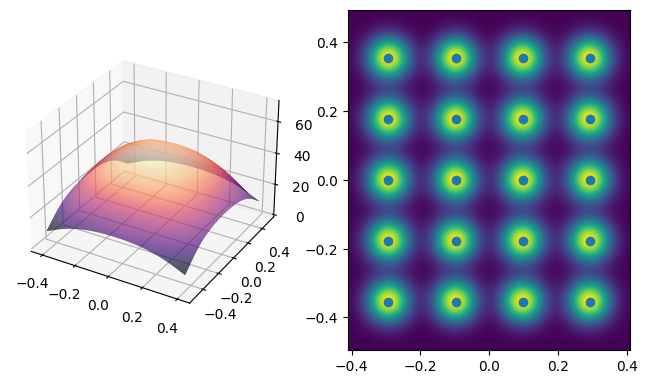

In [9]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot_surface(X, Y, esc_Z_linear, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax1.set_zlim([0, esc_Z_linear.max()*1.4])
ax2.imshow(
    esc_source_linear,
    extent=extent_xy)
ax2.scatter(*esc_array_linear.to_meshgrid())
plt.show()

### Recatangular

In [10]:
esc_array_rectangular = h* crit.ESC.array(s, Nx, Ny, shape="R")

In [11]:
Wx, Wy = esc_array_rectangular.area
(X, Y), extents_xy = utils.misc.plot_xy_mesh((-Wx, Wx, -Wy, Wy), (0.7, 0.7), (400, 400))
# Intensity calcualtion
esc_Z_rectangular = esc_array_rectangular.intensity_on((X,Y), lamber_pattern)
esc_source_rectangular = esc_array_rectangular.intensity_on((X,Y), lambda d: radiation.gaussian(1, 0.06, d))

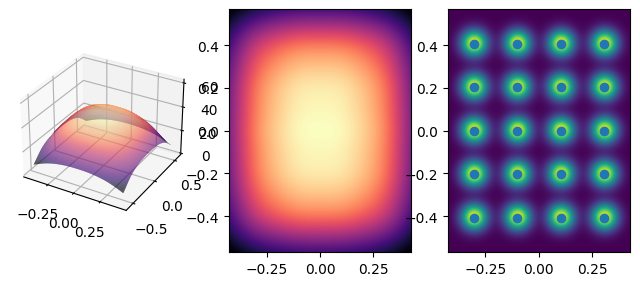

In [12]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.plot_surface(X, Y, esc_Z_rectangular, rstride= 1, cstride =1, cmap='magma', edgecolor='none')
ax1.set_zlim([0, 1.4*esc_Z_rectangular.max()])
ax2.imshow(esc_Z_rectangular, cmap='magma', extent= extents_xy) 
ax3.imshow(esc_source_rectangular, extent= extents_xy)
ax3.scatter(*esc_array_rectangular.to_meshgrid())
plt.show()

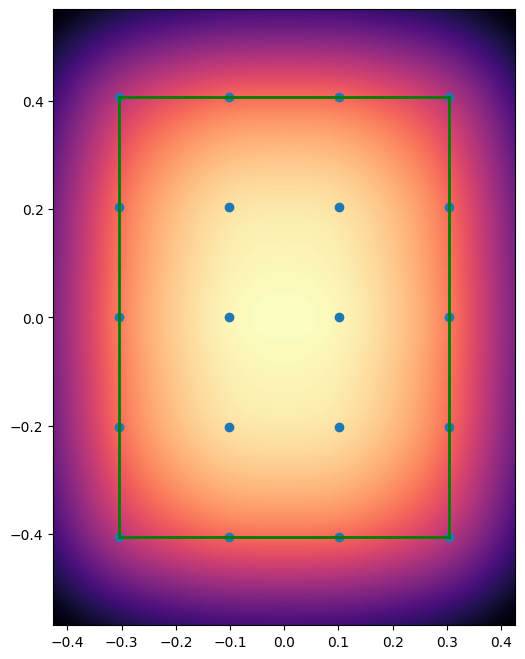

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
for ps in utils.misc.rectangle_line_points(Wx, Wy):
    ax.plot(ps[0], ps[1], 'g-', linewidth=2)
ax.imshow(esc_Z_rectangular, cmap='magma', extent= extents_xy)
ax.scatter(*esc_array_rectangular.to_meshgrid())
plt.show()

## Fill a given area $W_x \times W_y$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")


In [2]:
from uilc import esc, radiation, PositionArray
from uilc import utils

In [3]:
s = 4
h = 0.3
Wx, Wy = 0.7, 0.5
lamber_pattern = lambda d: radiation.lambertian(s, h, d)

In [20]:
N_linear_per= esc.nmax_for_region(s, [Wx, Wy], h, shape="L")
N_linear= esc.nmax_for_region(s, [Wx, Wy], h, shape="L", permit_exceed=False)
N_rect_per = esc._rectangular_nmax(s, W=[Wx, Wy], H=h, thershold=0.3, permit_exceed=True) 
N_rect = esc._rectangular_nmax(s, W=[Wx, Wy], H=h, thershold=0.3, permit_exceed=False) 
Nx_r, Ny_r = N_rect[1:3]
arrays = [
    h* esc.array(s, *N_linear_per[1:3], shape="L"),
    h* esc.array(s, *N_linear[1:3], shape="L"),
    PositionArray.uniform_fill((Wx, Wy), (N_linear_per[1:3])),
    h* esc.array(s, *N_rect_per[1:3], shape="R"),
    h* esc.array(s, Nx_r+1, Ny_r, shape="R"),
    PositionArray.uniform_fill((Wx, Wy), (Nx_r+1, Ny_r)),
]
array_legends =[
    ["Linear_permit_exceed"],
    ["Liner"],
    ["Uniform"],
    ["Rect_permit_exceed"],
    ["Rect"],
    ["Unirom, rect"]
]

In [21]:
(X, Y), extent_xy = utils.misc.plot_xy_mesh([-Wx/2, Wx/2, -Wy/2, Wy/2] , (1, 1), (400, 400))
intensity_map = [ array.intensity_on((X,Y), lamber_pattern) for array in arrays]
intensity_ceiling = [utils.misc.data_ceiling(intensity, 10) for intensity in intensity_map]

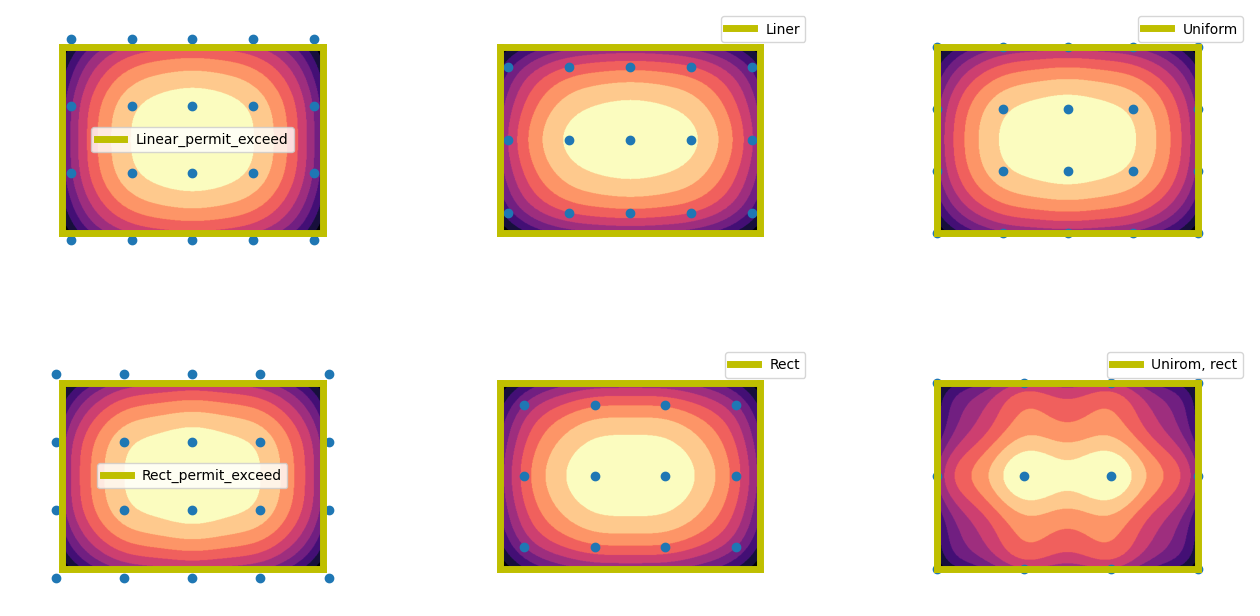

In [22]:
fig = plt.figure(figsize=(16,8))
axs = [  fig.add_subplot( 2, 3, 1),
         fig.add_subplot( 2, 3, 2),
         fig.add_subplot( 2, 3, 3),
         fig.add_subplot( 2, 3, 4),
         fig.add_subplot( 2, 3, 5),
         fig.add_subplot( 2, 3, 6),
      ]
for i, ax in enumerate(axs):
    ax.set_axis_off()
    ax.set_xlim([-0.7*Wx, 0.7*Wx])
    ax.set_ylim([-0.7*Wy, 0.7*Wy])
    ax.imshow(intensity_ceiling[i], cmap='magma', extent = extent_xy)
    for ps in utils.misc.rectangle_line_points(Wx, Wy):
        ax.plot(ps[0], ps[1], 'y-', linewidth=5)
    ax.scatter(*arrays[i].to_meshgrid())
    ax.legend(array_legends[i])
#ax_test.set_xlim(0, Wx)
#ax_test.set_ylim(0, Wy)
plt.show()

In [23]:
for array in intensity_map:
    print(f"Mean: {array.mean()/array.max():0.4}, Emin/Emax: {array.min()/array.max():.4}, std/Emax: {array.std()/array.max():.4}")

Mean: 0.8639, Emin/Emax: 0.5568, std/Emax: 0.09866
Mean: 0.8224, Emin/Emax: 0.4658, std/Emax: 0.1165
Mean: 0.8669, Emin/Emax: 0.5736, std/Emax: 0.09157
Mean: 0.8952, Emin/Emax: 0.6517, std/Emax: 0.07404
Mean: 0.8014, Emin/Emax: 0.4089, std/Emax: 0.1322
Mean: 0.8889, Emin/Emax: 0.7064, std/Emax: 0.06068


## Non-Heuristhic Methods

### Boundary-Matching

In [38]:
s = 4
h = 0.3
Wx, Wy = 0.6, 0.5
lamber_pattern = lambda d: Radiation.lambertian(s, h, d)

In [39]:
xe = OP.xe(s, Wx, h)
ye = OP.xe(s, Wy, h)
xm = OP.xm(s, Wx, h, xe)
ym = OP.xm(s, Wy, h, ye)

In [40]:
nx = OP.fill_rq(s, h, xm, xe, status = 1)
ny = OP.fill_rq(s, h, ym, ye, status = 1)

In [41]:
bc_pq_array = h*ESC.array(s, nx, ny)

In [61]:
bc_x, bc_y = OP.get_bc_expansion(bc_pq_array, s, h, Wx, Wy)
bc_arr = PositionArray.from_arrays(bc_x, np.delete(bc_y, [1,4]))  

x_ex:[0.3, 0.3]
xarr:[-0.11338934  0.11338934]
dx:0.2267786838055363
y_ex:[0.25, 0.1920350723659411]
yarr:[-0.11338934  0.11338934]
dy:0.2267786838055363


In [62]:
plot_dim = (400, 400)
plot_xy= Utils.plane_meshgrid((-0.6*Wx, 0.6*Wx), (-0.6*Wy, 0.6*Wy), plot_dim)
plot_xy, extent_xy = Utils.plot_xy_mesh([-Wx/2, Wx/2, -Wy/2, Wy/2] , (1, 1), (400, 400))

In [63]:
sources_dis = bc_arr.intensity_on(plot_xy,  lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.06, 0))
int_bc = bc_arr.intensity_on(plot_xy,  lambda d: Radiation.lambertian(s, h, d))
bc_ceil = Utils.data_ceiling(int_bc, 5)

In [64]:
dim_x, dim_y = plot_dim
dx = dim_x/(2*Wx)
dy = dim_y/(2*Wy)

In [65]:
given_region = Utils.rectangle_line_points(Wx, Wy)
min_region =  Utils.rectangle_line_points(xm, ym)
xe_region = Utils.rectangle_line_points(xe, ye)

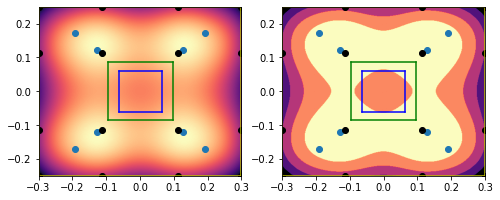

In [66]:
fig = plt.figure(figsize=(8,8))
ax = [fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)]
for p in given_region:
    ax[0].plot(*p, "y-")
    ax[1].plot(*p, "y-")
for p in min_region:
    ax[0].plot(*p, "b-")
    ax[1].plot(*p, "b-")
for p in xe_region:
    ax[0].plot(*p, "g-")
    ax[1].plot(*p, "g-")
ax[0].imshow( int_bc, 
    extent=extent_xy,
    cmap = "magma"
    )
ax[0].scatter(
    [xm, xm, -xm, -xm, xe, xe, -xe, -xe], 
    [ym, -ym, ym, -ym, ye, -ye, ye, -ye]) 
ax[0].scatter(*bc_arr.to_meshgrid(),  color="black")
ax[1].imshow(
    bc_ceil, 
    extent=extent_xy,
    cmap = "magma"
    )

ax[1].scatter(
    [xm, xm, -xm, -xm, xe, xe, -xe, -xe], 
    [ym, -ym, ym, -ym, ye, -ye, ye, -ye]) 
ax[1].scatter(*bc_arr.to_meshgrid(), color="black")
ax[0].set_autoscale_on(False)
ax[1].set_autoscale_on(False)
plt.show()

In [22]:
a_norm = int_bc/int_bc.max()
a = np.where(a_norm > 0.8, 1, a_norm)
a = np.where((a<= 0.8) & (a> 0.6), 0.66, a)
a = np.where((a<= 0.6) & (a> 0.4), 0.35, a)
a = np.where(a<=0.2, 0, a)

In [49]:
measure_xy= Utils.plane_meshgrid((-0.5*Wx, 0.5*Wx), (-0.5*Wy, 0.5*Wy), plot_dim)
int_bc_area = bc_arr.intensity_on(measure_xy,  lambda d: Radiation.lambertian(s, H, d))
int_bc_area_norm = int_bc_area/int_bc_area.max()

In [50]:
int_bc_area_norm.mean()

0.8966958357909208

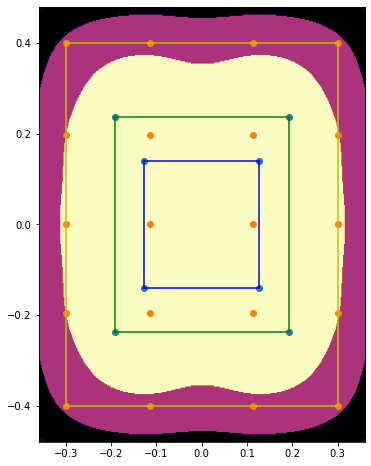

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
for p in given_region:
    ax.plot(*p, "y-")
for p in min_region:
    ax.plot(*p, "b-")
for p in xe_region:
    ax.plot(*p, "g-")
ax.plot()
ax.imshow(
    a, 
    extent=[-0.6*Wx, 0.6*Wx,-0.6*Wy, 0.6*Wy],
    cmap = "magma"
    )
ax.scatter(
    [xm, xm, -xm, -xm, xe, xe, -xe, -xe], 
    [ym, -ym, ym, -ym, ye, -ye, ye, -ye])
    
ax.scatter(
    *bc_arr.to_meshgrid()
)
ax.set_autoscale_on(False)
plt.show()

### Power Weight

KDE binarization

Frequncy binarization